In [27]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
################### READ IN THE DATASET FIRST #########################
df = pd.read_csv('./local_data/TB_Burden_Country.csv')
print(df.columns)
print(df.shape)

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [29]:
################## Identify Columns needed and which to drop #########################
#analyze in excel if possible
#identify columns to keep based on business objective
#Objective --> identify which countries have a high prevelence of turberculosis cases and which have higher death rates



columns_keep = [
    'Country or territory name',
    'ISO 3-character country/territory code',
    'Region',
    'Year',
    'Estimated total population number',
    'Estimated prevalence of TB (all forms)',
    'Method to derive prevalence estimates',
    'Estimated number of deaths from TB (all forms, excluding HIV)',
    'Estimated number of deaths from TB in people who are HIV-positive',
    'Method to derive mortality estimates',
    'Estimated number of incident cases (all forms)'
]

df = df[columns_keep]
print(df.shape)

(5120, 11)


In [30]:
# Continue to clean up dataset prior to feature engineering and wrangling
col_mapping = {
    'Country or territory name': 'country',
    'ISO 3-character country/territory code': 'country_code',
    'Region': 'region',
    'Year': 'year',
    'Estimated total population number': 'population',
    'Estimated prevalence of TB (all forms)': 'tb_prevalence_all_forms',
    'Method to derive prevalence estimates': 'prevalence_method',
    'Estimated number of deaths from TB (all forms, excluding HIV)': 'tb_deaths_exc_hiv',
    'Estimated number of deaths from TB in people who are HIV-positive': 'tb_death_hiv',
    'Method to derive mortality estimates': 'mortality_method',
    'Estimated number of incident cases (all forms)': 'num_incidents_all_forms'
}
df.rename(columns=col_mapping, inplace=True)

In [31]:
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms
0,Afghanistan,AFG,EMR,1990,11731193,36000.0,predicted,4300.0,5.0,Indirect,22000.0
1,Afghanistan,AFG,EMR,1991,12612043,43000.0,predicted,5800.0,8.0,Indirect,24000.0
2,Afghanistan,AFG,EMR,1992,13811876,51000.0,predicted,7400.0,11.0,Indirect,26000.0
3,Afghanistan,AFG,EMR,1993,15175325,59000.0,predicted,9100.0,17.0,Indirect,29000.0
4,Afghanistan,AFG,EMR,1994,16485018,68000.0,predicted,11000.0,22.0,Indirect,31000.0
...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,AFR,2009,12888918,58000.0,predicted,5000.0,27000.0,Indirect,87000.0
5116,Zimbabwe,ZWE,AFR,2010,13076978,54000.0,predicted,4700.0,26000.0,Indirect,83000.0
5117,Zimbabwe,ZWE,AFR,2011,13358738,56000.0,predicted,5100.0,24000.0,Indirect,80000.0
5118,Zimbabwe,ZWE,AFR,2012,13724317,58000.0,predicted,5600.0,22000.0,Indirect,79000.0


In [32]:
##### Remove any duplicate rows #######
unique_list = df.duplicated(keep=False)

In [33]:
unique_list

0       False
1       False
2       False
3       False
4       False
        ...  
5115    False
5116    False
5117    False
5118    False
5119    False
Length: 5120, dtype: bool

In [34]:
df[df.duplicated(keep=False)]  #applied keeping all unique values only to df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms


In [35]:
##### Remove any rows/columns with missing values - Nulls (if any) #######
df.isnull().sum() #there are no missing values in our dataset

country                    0
country_code               0
region                     0
year                       0
population                 0
tb_prevalence_all_forms    0
prevalence_method          0
tb_deaths_exc_hiv          0
tb_death_hiv               0
mortality_method           0
num_incidents_all_forms    0
dtype: int64

In [36]:
######## Remove any outliers (if any) ##########
#first I need to group data by country (collapse dates) or select one record per country to analyze



In [37]:
df.describe()

,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms
count,5120.000000,5.120000e+03,5.120000e+03,5120.000000,5120.000000,5.120000e+03
mean,2001.549023,2.915671e+07,6.654332e+04,6863.985914,1798.730236,4.218835e+04
std,6.933272,1.183725e+08,3.249488e+05,30554.560700,7915.691847,1.865701e+05
min,1990.000000,1.129000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1996.000000,5.601190e+05,3.800000e+02,18.000000,0.000000,2.600000e+02
50%,2002.000000,5.172118e+06,4.300000e+03,280.000000,6.500000,3.100000e+03
75%,2008.000000,1.752404e+07,2.700000e+04,2200.000000,270.000000,1.800000e+04
max,2013.000000,1.385567e+09,4.600000e+06,420000.000000,96000.000000,2.400000e+06


In [38]:
# First convert the year column to datetime format
df['year'] = pd.to_datetime(df['year']) #--> converted existing column

# Group by country and get maximum date for each country (new df created)
max_dates = df.groupby('country')['year'].max().reset_index()  #--> this is a new dataframe

# Finally create the new column based on this mapping
df['max_date'] = df.apply(lambda row: row['year'] == max_dates[max_dates['country'] == row['country']]['year'].values[0], axis=1)

In [44]:
# let's analyze our new output
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms,max_date
0,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001990,11731193,36000.0,predicted,4300.0,5.0,Indirect,22000.0,False
1,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001991,12612043,43000.0,predicted,5800.0,8.0,Indirect,24000.0,False
2,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001992,13811876,51000.0,predicted,7400.0,11.0,Indirect,26000.0,False
3,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001993,15175325,59000.0,predicted,9100.0,17.0,Indirect,29000.0,False
4,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001994,16485018,68000.0,predicted,11000.0,22.0,Indirect,31000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002009,12888918,58000.0,predicted,5000.0,27000.0,Indirect,87000.0,False
5116,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002010,13076978,54000.0,predicted,4700.0,26000.0,Indirect,83000.0,False
5117,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002011,13358738,56000.0,predicted,5100.0,24000.0,Indirect,80000.0,False
5118,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002012,13724317,58000.0,predicted,5600.0,22000.0,Indirect,79000.0,False


In [54]:
# now let's grab only the most recent year infomation for each country in this dataset
df = df[df['max_date'] == True]#.copy()

In [55]:
#continue to clean and ready our dataset
#drop additonal columns not needed for our objectives

df = df.drop(['prevalence_method', 'mortality_method', 'max_date'], axis=1)
df

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms
23,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,13000.00,82.00,58000.0
47,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,20.00,0.00,590.0
71,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,5100.00,35.00,32000.0
95,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,0.35,0.00,4.0
119,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,0.26,0.00,5.8
...,...,...,...,...,...,...,...,...,...
5023,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,0.30,0.00,1.2
5047,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,8.90,0.56,200.0
5071,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,990.00,18.00,12000.0
5095,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,3600.00,8600.00,60000.0


In [57]:
### Create new columns for comparative analysis
df['tb_prev_ratio'] = df['tb_prevalence_all_forms'].div(df['population'], axis=0)
df['tb_death_ratio_to_prev'] = df['tb_deaths_exc_hiv'].div(df['tb_prevalence_all_forms'], axis=0)
df

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
23,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
47,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
71,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
95,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
119,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...,...,...,...,...
5023,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
5047,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
5071,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
5095,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


In [58]:
# Now let's go back and analyze our outliers based on tb_prev_ratio AND tb_death_ratio_to_prev
# create our outlier function first

def outliers_zscore (df: object, column_name: str) :
    z_score = np.abs((df[column_name] - df[column_name].mean() / df[column_name].std()))
    #now identify outliers with a z-score greater than 3
    threshold = 3
    outliers = df[z_score > threshold]
    return outliers

In [59]:
# here are the outliers in TB_PREV_RATIO (Turberculosis Prevelance Ratio - if any)
tb_prev_ratio_outliers = outliers_zscore(df, 'tb_prev_ratio')
tb_prev_ratio_outliers

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev


In [60]:
# here are the outliers in TB_DEATH_RATIO_TO_PREV (Turberculosis Death Ratio to Prevelance - if any)
tb_death_to_prev_ratio_outliers = outliers_zscore(df, 'tb_death_ratio_to_prev')
tb_death_to_prev_ratio_outliers

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev


<Axes: xlabel='tb_prev_ratio'>

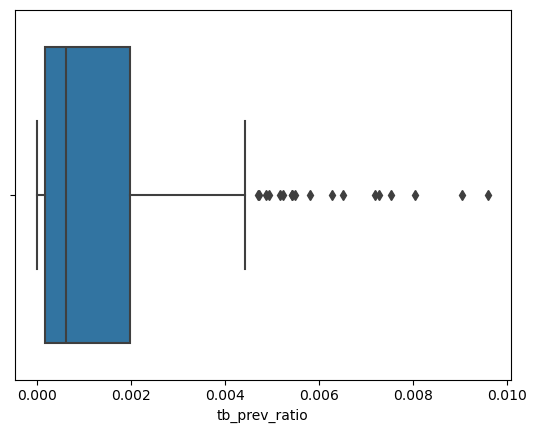

In [61]:
#let's verify visually
sns.boxplot(x=df['tb_prev_ratio'])

In [62]:
# First create new dataframe with numeric values only
df_numeric = df.select_dtypes(include='number')
df_numeric

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
23,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
47,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
71,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
95,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
119,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...
5023,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
5047,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
5071,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
5095,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


In [65]:
#Let us normalize the data first (put the data between -1 and 1 for easier comparative purposes)

df_numeric_normalized = df_numeric.copy()
for column in df_numeric_normalized.columns:
    df_numeric_normalized[column] = df_numeric_normalized[column] / df_numeric_normalized[column].abs().max()
df_numeric_normalized

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
23,0.022050,3.846154e-02,0.054167,0.000965,2.761905e-02,0.340820,0.0
47,0.002290,3.269231e-04,0.000083,0.000000,2.809524e-04,0.027891,0.0
71,0.028298,1.884615e-02,0.021250,0.000412,1.523810e-02,0.130131,0.0
95,0.000040,2.000000e-06,0.000001,0.000000,1.904762e-06,0.009815,0.0
119,0.000057,2.500000e-06,0.000001,0.000000,2.761905e-06,0.008544,0.0
...,...,...,...,...,...,...,...
5023,0.000010,8.461538e-07,0.000001,0.000000,5.714286e-07,0.017260,0.0
5047,0.003122,1.192308e-04,0.000037,0.000007,9.523810e-05,0.007461,0.0
5071,0.017615,5.769231e-03,0.004125,0.000212,5.714286e-03,0.063993,0.0
5095,0.010493,1.884615e-02,0.015000,0.101176,2.857143e-02,0.350939,0.0


<Axes: xlabel='tb_prev_ratio'>

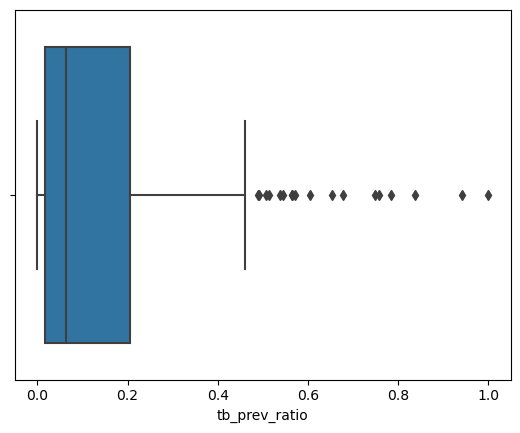

In [66]:
#let's verify visually again with scaled values
sns.boxplot(x=df_numeric_normalized['tb_prev_ratio'])

In [67]:
# here are the outliers in TB_PREV_RATIO (Turberculosis Prevelance Ratio - if any)
tb_prev_ratio_outliers = outliers_zscore(df_numeric_normalized, 'tb_prev_ratio')
tb_prev_ratio_outliers

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev


In [72]:
from scipy import stats
df_numeric

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
23,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
47,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
71,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
95,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
119,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...
5023,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
5047,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
5071,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
5095,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


In [73]:
z = np.abs(stats.zscore(df_numeric['tb_prev_ratio']))
z

23      1.006485
47      0.610925
71      0.082489
95      0.704354
119     0.710926
          ...   
5023    0.665874
5047    0.716522
5071    0.424331
5095    1.058790
5119    1.450975
Name: tb_prev_ratio, Length: 219, dtype: float64

In [76]:
threshold = 3
outlier_indices = np.where(z > threshold)[0]
no_outliers = df_numeric.drop(outlier_indices, axis=1)
print('original dataframe shape: ', df_numeric.shape)
print('dataframe after removal of outliers: ', no_outliers.shape)

KeyError: '[35, 59, 102, 179, 185, 192] not found in axis'